In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
rd = pd.read_csv("winequality-red.csv",sep=";")

In [37]:
rd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
wd= pd.read_csv("winequality-white.csv", sep=";")
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [69]:
df = pd.DataFrame(data = rd)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [100]:
df.shape

(1451, 13)

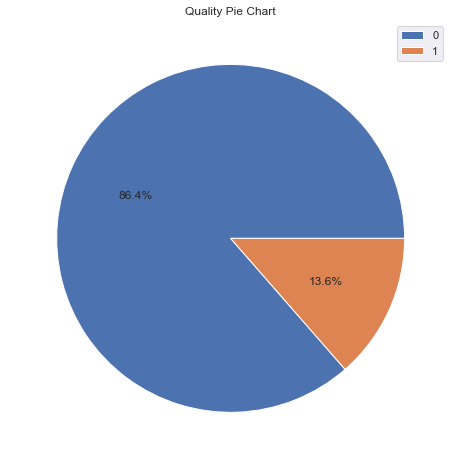

The good quality wines count for  13.6 %.


In [71]:
df['grade'] = 1 # good
df.grade[df.quality < 7] = 0 # not good

plt.figure(figsize = (8,8))
labels = df.grade.value_counts().index

plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")


plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(df.grade.value_counts(normalize=True)[1]*100,1),'%.')

In [98]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.96024611, 0.78782264,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.58477711, 0.78782264,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.58477711, 0.78782264,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54162988, 0.45084835,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.20930812, 0.78782264,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.54162988, 0.45084835,
        0.39625599]])

In [105]:
thresholds = 3
df = df[(z<3).all(axis=1)]

ValueError: Item wrong length 1599 instead of 1451.

In [106]:
df.shape

(1451, 13)

In [107]:
dfcorr = df.corr()
dfcorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163,0.125791
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443,-0.267836
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999,0.227633
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482,0.117036
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787,-0.112080
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202,-0.086402
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745,-0.172638
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568,-0.153031
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164,-0.079105
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567,0.310432


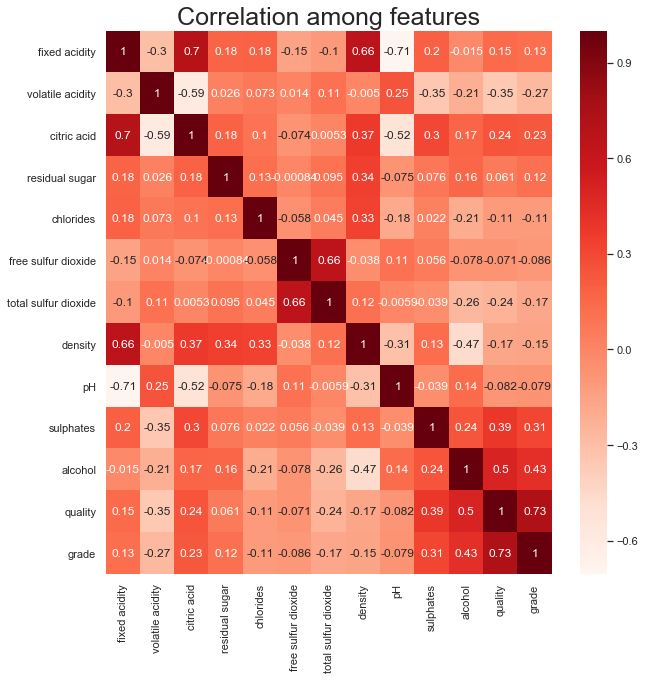

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr, cmap="Reds", annot = True)
plt.title("Correlation among features",  y = 1.05,fontsize = 25)
plt.show()

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtc = DecisionTreeClassifier()

In [111]:
x = df.iloc[:,0 :-2].values
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [112]:
y = df.iloc[:, -2].values
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33, random_state=47)


In [114]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
pred = dtc.predict(x_test)
pred

array([6, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 6, 5, 7, 6, 5, 5, 4, 5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 5,
       6, 7, 6, 6, 7, 6, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6, 6, 7,
       5, 5, 6, 6, 6, 7, 8, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 4,
       7, 6, 4, 6, 6, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 4, 7, 6, 5, 5, 5,
       5, 5, 5, 7, 4, 5, 7, 6, 6, 7, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6,
       6, 6, 5, 6, 7, 5, 6, 5, 6, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6, 6, 6, 7,
       6, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 7,
       7, 5, 5, 6, 5, 6, 6, 7, 6, 7, 7, 6, 6, 7, 6, 6, 5, 5, 6, 4, 5, 5,
       5, 7, 5, 5, 6, 6, 6, 5, 6, 5, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5,

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [117]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.6534446764091858
[[  1  11   1   1   0]
 [  5 156  43   5   0]
 [  5  49 115  13   0]
 [  1   8  20  40   0]
 [  0   2   0   2   1]]
              precision    recall  f1-score   support

           4       0.08      0.07      0.08        14
           5       0.69      0.75      0.72       209
           6       0.64      0.63      0.64       182
           7       0.66      0.58      0.62        69
           8       1.00      0.20      0.33         5

   micro avg       0.65      0.65      0.65       479
   macro avg       0.61      0.45      0.48       479
weighted avg       0.65      0.65      0.65       479



In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [120]:
dt = dtc.predict_proba(x_test)[:,0]

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, dt)

ValueError: multiclass format is not supported